# Parsing PDFs Homework

With the power of pdfminer, pytesseract, Camelot, and Tika, let's analyze some documents!

> If at any point you think, **"I'm close enough, I'd just edit the rest of it in Excel"**: that's fine! Just make a note of it.

## A trick to use again and again

### Approach 1

Before we get started: when you want to take the first row of your data and set it as the header, use this trick.

In [1]:
import pandas as pd
import numpy as np

/Users/hiromi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.DataFrame([
    [ 'fruit name', 'likes' ],
    [ 'apple', 15 ],
    [ 'carrot', 3 ],
    [ 'sweet potato', 45 ],
    [ 'peach', 12 ],
])
df

,0,1
0,fruit name,likes
1,apple,15
2,carrot,3
3,sweet potato,45
4,peach,12


In [3]:
# Set the first column as the columns
df.columns = df.loc[0]

In [4]:
# Drop the first row
df = df.drop(0)

In [5]:
df

,fruit name,likes
1,apple,15
2,carrot,3
3,sweet potato,45
4,peach,12


🚀 Done!

### Approach 2

Another alternative is to use `.rename` on your columns and just filter out the columns you aren't interested in. This can be useful if the column name shows up multiple times in your data for some reason or another.

In [6]:
# Starting with the same-ish data...
df = pd.DataFrame([
    [ 'fruit name', 'likes' ],
    [ 'apple', 15 ],
    [ 'carrot', 3 ],
    [ 'fruit name', 'likes' ],
    [ 'sweet potato', 45 ],
    [ 'peach', 12 ],
])
df

,0,1
0,fruit name,likes
1,apple,15
2,carrot,3
3,fruit name,likes
4,sweet potato,45
5,peach,12


In [7]:
df = df.rename(columns={
    0: 'fruit name',
    1: 'likes'
})
df = df[df['fruit name'] != 'fruit name']
df

,fruit name,likes
1,apple,15
2,carrot,3
4,sweet potato,45
5,peach,12


🚀 Done!

### Useful tips about coordinates

If you want to grab only a section of the page [Kull](https://jsoma.github.io/kull/#/) might be helpful in finding the coordinates.

> **Alternatively** run `%matplotlib notebook` in a cell. Afterwards, every time you use something like `camelot.plot(tables[0]).show()` it will get you nice zoomable, hoverable versions that include `x` and `y` coordinates as you move your mouse.

Coordinates are given as `"left_x,top_y,right_x,bottom_y"` with `(0,0)` being in the bottom left-hand corner.

Note that all coordinates are strings, for some reason. It won't be `[1, 2, 3, 4]` it will be `['1,2,3,4']`

# The homework

This is **mostly Camelot work**, because I don't really have any good image-based PDFs to stretch your wings on tesseract. If you know of any, let me know and I can put together another couple exercises.

## Prison Inmates

Working from [InmateList.pdf](InmateList.pdf), save a CSV file that includes every inmate.

* Make sure your rows are *all data*, and you don't have any people named "Inmate Name."


In [2]:
import camelot
import matplotlib.pyplot as plt
from pdfminer.high_level import extract_text
import tika
from tika import parser
import pytesseract

In [71]:
tables = camelot.read_pdf('InmateList.pdf', flavor='stream', pages='all')
df_inmate_test = pd.concat([tab.df for tab in tables], ignore_index=True)
df_inmate_test.to_csv('inmatetest.csv')

### page 1-6, 8-15 is same structurer, page 7 & 16 is different. Try separately

In [10]:
tables = camelot.read_pdf('InmateList.pdf', flavor='stream', pages='1-6')
tables

<TableList n=6>

In [11]:
df_inmate1 = pd.concat([tab.df for tab in tables], ignore_index=True)

In [13]:
df_inmate1 = df_inmate1.rename(columns={0:'ICN #', 1:'Inmate Name', 3:'Facility',4:'Booking Date'}).drop(columns=[2,5])

In [15]:
df_inmate1 = df_inmate1[(df_inmate1.Facility != "Erie County Sheriff's Office") & (df_inmate1.Facility != "Inmate Roster")&(df_inmate1.Facility != "Facility")&(df_inmate1['ICN #'] != "Created On:")]

In [65]:
# df_inmate1.head(3)

In [22]:
table2 = camelot.read_pdf('InmateList.pdf', flavor='stream', pages='7')
df_inmate2 = table2[0].df

In [24]:
df_inmate2 = df_inmate2.rename(columns={0:'ICN #', 1:'Inmate Name', 2:'Facility',3:'Booking Date'}).drop(columns=[4])

In [28]:
df_inmate2 = df_inmate2.drop([0,1,2,46])

In [66]:
# df_inmate2.tail(3)

In [31]:
tables3 = camelot.read_pdf('InmateList.pdf', flavor='stream', pages='8-15')
tables3

<TableList n=8>

In [32]:
df_inmate3 = pd.concat([tab.df for tab in tables3], ignore_index=True)

In [34]:
df_inmate3 = df_inmate3.rename(columns={0:'ICN #', 1:'Inmate Name', 3:'Facility',4:'Booking Date'}).drop(columns=[2,5])

In [37]:
df_inmate3 = df_inmate3[(df_inmate3.Facility != "Erie County Sheriff's Office") & (df_inmate3.Facility != "Inmate Roster")&(df_inmate3.Facility != "Facility")&(df_inmate3['ICN #'] != "Created On:")]

In [67]:
# df_inmate3.head(3)

In [43]:
tables4 = camelot.read_pdf('InmateList.pdf', flavor='stream', pages='16')
df_inmate4 = tables4[0].df

In [45]:
df_inmate4 = df_inmate4.rename(columns={0:'ICN #', 1:'Inmate Name', 2:'Facility',3:'Booking Date'})

In [49]:
df_inmate4 = df_inmate4.drop([0,1,2])

In [68]:
# df_inmate4.head(3)

In [51]:
df_inmate = pd.concat([df_inmate1, df_inmate2, df_inmate3,df_inmate4], axis=0)

In [52]:
df_inmate.to_csv("InmateList.csv", index =False)

## WHO resolutions

Using [A74_R13-en.pdf](A74_R13-en.pdf), what ten member countries are given the highest assessments?

* You might need to have two separate queries, and combine the results: that last page is pretty awful!
* Always rename your columns
* Double-check that your sorting looks right......
* You can still get the answer even without perfectly clean data

In [5]:
tables = camelot.read_pdf('A74_R13-en.pdf', flavor='stream', pages='all')
tables
df_who_test = pd.concat([tab.df for tab in tables], ignore_index=True)
df_who_test.to_csv('whotest.csv')

### 2 countries in the last page (Zambia, Zimbabe) are clearly NOT 10 member countries given the highest assessments. We don't need this page for the purpose.

In [6]:
tables1 = camelot.read_pdf('A74_R13-en.pdf', flavor='stream', pages='1-5')
df_who1 = pd.concat([tab.df for tab in tables1], ignore_index=True)

In [7]:
df_who1 = df_who1.rename(columns = {0:'Members and Associate Members', 1: 'WHO scale for 2022–2023 (%)'} )

In [8]:
df_who1 = df_who1[(df_who1['WHO scale for 2022–2023 (%)'] != 'WHO scale')&(df_who1['WHO scale for 2022–2023 (%)'] != 'for 2022–2023')&(df_who1['WHO scale for 2022–2023 (%)'] != '%')]

In [9]:
df_who1.tail()

,Members and Associate Members,WHO scale for 2022–2023 (%)
210,Uzbekistan,0.0320
211,Vanuatu,0.0010
212,Venezuela (Bolivarian Republic of),0.7280
213,Viet Nam,0.0770
214,Yemen,0.0100


In [74]:
# df_who1.info()

In [11]:
df_who1[df_who1['WHO scale for 2022–2023 (%)'] == '']

,Members and Associate Members,WHO scale for 2022–2023 (%)
45,Cook Islands (not a member of the,
53,Democratic People’s Republic of,
140,Niue (not a member of the United,
154,Puerto Rico (not a member of the,
194,Tokelau (not a member of the United,
205,United Kingdom of Great Britain and,


#### memo:  53/54 = Democratic People’s Republic of Korea, 205/206 = United Kingdom of Great Britain and Northern Ireland. Other countries are not UN countries, we don't have to take care for the purpose of finding top 10 member countries.

In [12]:
df_who1 = df_who1[df_who1['WHO scale for 2022–2023 (%)'] != '']

In [15]:
df_who1.dtypes

Members and Associate Members     object
WHO scale for 2022–2023 (%)      float64
dtype: object

In [14]:
df_who1['WHO scale for 2022–2023 (%)'] = df_who1['WHO scale for 2022–2023 (%)'].astype(float)

In [23]:
df_who1 = df_who1.set_index('Members and Associate Members')

In [25]:
topten = df_who1['WHO scale for 2022–2023 (%)'].nlargest(10)

### This is 10 countries list given the highest assessments.

In [75]:
pd.DataFrame(topten)

,WHO scale for 2022–2023 (%)
Members and Associate Members,
United States of America,22.0000
China,12.0058
Japan,8.5645
Germany,6.0904
Northern Ireland,4.5673
France,4.4273
Italy,3.3072
Brazil,2.9482
Canada,2.7342


In [73]:
pd.DataFrame(topten).to_csv('top10-UNassess-countries.csv')

## The Avengers

Using [THE_AVENGERS.pdf](THE_AVENGERS.pdf), approximately how many lines does Captain America have as compared to Thor and Iron Man?

* Character names only: we're only counting `IRON MAN` as Iron Man, not `TONY`.
* Your new best friend might be `\n`
* Look up `.count` for strings

In [31]:
parsed = parser.from_file('THE_AVENGERS.pdf')

In [34]:
text = parsed['content'].strip()

In [39]:
ironman = text.count("IRON MAN")
ironman

52

In [40]:
captain_america = text.count("CAPTAIN AMERICA")
captain_america

40

In [41]:
thor = text.count("THOR")
thor

49

## Answer : Captain America has 40 lines, while IRON MAN 52 and THOR 49. 

## COVID data

Using [covidweekly2721.pdf](covidweekly2721.pdf), what's the total number of tests performed in Minnesota? Use the Laboratory Test Rates by County of Residence chart.

* You COULD pull both tables separately OR you could pull them both at once and split them in pandas.
* Remember you can do things like `df[['name','age']]` to ask for multiple columns

In [76]:
tables = camelot.read_pdf('covidweekly2721.pdf', flavor='lattice', pages='6')
tables

<TableList n=2>

In [81]:
covid = tables[1].df

In [72]:
# covid.head(3)

In [96]:
df_covid1 = covid[[0,1]].rename(columns={0: 'County', 1: 'Number of Tests'}).drop([0])

In [98]:
df_covid2 = covid[[3,4]].rename(columns={3: 'County', 4: 'Number of Tests'}).drop([0])

In [105]:
df_covid1 = df_covid1.replace('77,865\n9,953', '77,865')

In [135]:
# df_covid1.dtypes
# df_covid1.head(5)

In [134]:
# df_covid2.head(5)

In [123]:
df_covid = pd.concat([df_covid1, df_covid2], axis=0)

In [133]:
# df_covid.head()

In [129]:
df_covid = df_covid.replace(',','', regex=True)

In [132]:
df_covid['Number of Tests'] = df_covid['Number of Tests'].astype(int)

In [138]:
df_covid['Number of Tests'].sum()

10249823

In [148]:
df_covid['Number of Tests'][df_covid['County'] !='Unknown/missing'].sum()

9826687

## Answer:  According to Minnesota Department of Health Weekly COVID-19 Report updated on 7/8/2021, the total number of tests performed in Minnesota is 10,249,823.  If you don't want to count 'Unknown/missing' of county information , it is 9,826,687
One questionn remaining... This report also says total laboratory test are 10,386,334 at the beginning. Why it's no the same number?

In [150]:
df_covid.to_csv('coviddata.csv')

## Theme Parks

Using [2019-Theme-Index-web-1.pdf](2019-Theme-Index-web-1.pdf), save a CSV of the top 10 theme park groups worldwide.

* You can clean the results or you can restrict the area the table is pulled from, up to you

In [53]:
tables = camelot.read_pdf('2019-Theme-Index-web-1.pdf', flavor='stream', pages='11', table_areas=['41,459,397,297'])
tables

<TableList n=1>

<IPython.core.display.Javascript object>


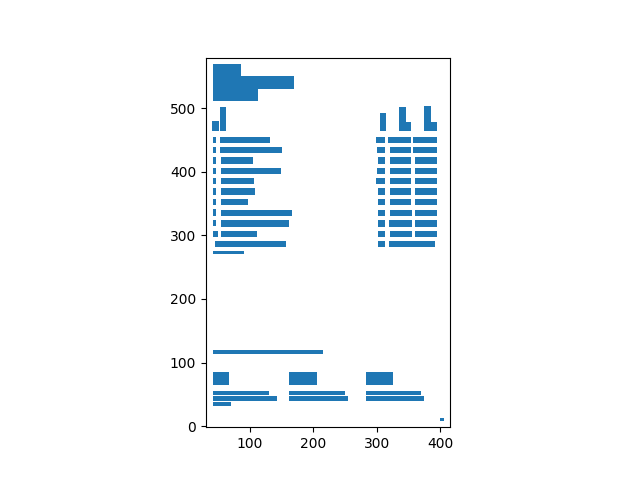

In [52]:
%matplotlib notebook
camelot.plot(tables[0]).show()

In [56]:
themepark = tables[0].df

In [58]:
themepark

,0,1,2,3,4
0,1,WALT DISNEY ATTRACTIONS,-0.8%,"155,991,000","157,311,000"
1,2,MERLIN ENTERTAINMENTS GROUP,0.9%,"67,000,000","66,400,000*"
2,3,OCT PARKS CHINA,9.4%,"53,970,000","49,350,000"
3,4,UNIVERSAL PARKS AND RESORTS,2.3%,"51,243,000","50,068,000"
4,5,FANTAWILD GROUP,19.8%,"50,393,000","42,074,000"
5,6,CHIMELONG GROUP,8.9%,"37,018,000","34,007,000"
6,7,SIX FLAGS INC.,2.5%,"32,811,000","32,024,000"
7,8,CEDAR FAIR ENTERTAINMENT COMPANY,7.8%,"27,938,000","25,912,000"
8,9,SEAWORLD PARKS & ENTERTAINMENT,0.2%,"22,624,000","22,582,000"
9,10,PARQUES REUNIDOS,6.2%,"22,195,000","20,900,000"


In [62]:
themepark = themepark.rename(columns = {0:'RANK', 1:'GROUP NAME', 2:'%CHANGE', 3: 'ATTENDANCE2019', 4:'ATTENDANCE2018'})

In [65]:
themepark = themepark.replace('66,400,000*','66,400,000')

In [69]:
themepark =  themepark.set_index('RANK')

In [70]:
themepark

,GROUP NAME,%CHANGE,ATTENDANCE2019,ATTENDANCE2018
RANK,,,,
1,WALT DISNEY ATTRACTIONS,-0.8%,"155,991,000","157,311,000"
2,MERLIN ENTERTAINMENTS GROUP,0.9%,"67,000,000","66,400,000"
3,OCT PARKS CHINA,9.4%,"53,970,000","49,350,000"
4,UNIVERSAL PARKS AND RESORTS,2.3%,"51,243,000","50,068,000"
5,FANTAWILD GROUP,19.8%,"50,393,000","42,074,000"
6,CHIMELONG GROUP,8.9%,"37,018,000","34,007,000"
7,SIX FLAGS INC.,2.5%,"32,811,000","32,024,000"
8,CEDAR FAIR ENTERTAINMENT COMPANY,7.8%,"27,938,000","25,912,000"
9,SEAWORLD PARKS & ENTERTAINMENT,0.2%,"22,624,000","22,582,000"


In [72]:
themepark.to_csv('top10-themepark-companies.csv')

## Hunting licenses

Using [US_Fish_and_Wildlife_Service_2021.pdf](US_Fish_and_Wildlife_Service_2021.pdf) and [a CSV of state populations](http://goodcsv.com/geography/us-states-territories/), find the states with the highest per-capita hunting license holders.

In [3]:
tables = camelot.read_pdf('US_Fish_and_Wildlife_Service_2021.pdf', flavor='lattice', pages='1')
tables

<TableList n=1>

In [4]:
df_hunt = tables[0].df

### We just need the data of 'state' and 'Paid Hunting License Holders'

In [7]:
df_hunt = df_hunt[[0,1]].replace(',','', regex=True)

In [9]:
df_hunt.columns = df_hunt.loc[0]
df_hunt = df_hunt.drop(0)

In [11]:
df_hunt = df_hunt.rename(columns={'Paid Hunting License \nHolders*': 'Paid Hunting License Holders'})

In [13]:
df_hunt['Paid Hunting License Holders'] = df_hunt['Paid Hunting License Holders'].astype(int)

### remove territories except DC

In [39]:
df_hunt = df_hunt[(df_hunt.State !='AS')&(df_hunt.State !='GU')&(df_hunt.State !='MP')&(df_hunt.State !='PR')&(df_hunt.State !='VI')&(df_hunt.State !='Total:')]

In [19]:
# len(df_hunt)
# df_hunt.dtypes

In [15]:
df_pop = pd.read_csv('us-states-territories.csv')

In [20]:
df_pop = df_pop[(df_pop.Type != 'Territory')]

In [26]:
df_pop1 = df_pop[['Name','Abbreviation','Population (2019)' ]].replace(',','', regex=True)

In [27]:
df_pop1['Population (2019)'] = df_pop1['Population (2019)'].astype(int)

In [32]:
# len(df_pop1)
# df_pop1.dtypes

In [34]:
df_pop1 = df_pop1.sort_values(by = 'Abbreviation', ascending=True)

In [42]:
df_pop1 = df_pop1.reset_index(drop=True)

In [43]:
df_hunt = df_hunt.reset_index(drop=True)

In [45]:
df_huntpop = df_hunt.join(df_pop1)

In [49]:
df_huntpop = df_huntpop[['Name','Paid Hunting License Holders','Population (2019)']]

In [55]:
df_huntpop['percapita'] = df_huntpop['Paid Hunting License Holders'] / df_huntpop['Population (2019)']*100

<ipython-input-55-c52699798cbd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_huntpop['percapita'] = df_huntpop['Paid Hunting License Holders'] / df_huntpop['Population (2019)']*100


In [60]:
df_huntpopranking = df_huntpop.sort_values(by='percapita', ascending=False)

In [62]:
df_huntpopranking.to_csv('huntlicence-per-capita.csv')

In [64]:
df_huntpopranking.head()

,Name,Paid Hunting License Holders,Population (2019),percapita
41,South Dakota,213786,884659,24.165922
50,Wyoming,135228,578759,23.365166
26,Montana,222309,1068778,20.800297
28,North Dakota,135724,762062,17.810099
13,Idaho,275244,1787065,15.402014


## Answer: South Dakota is the state which has the highest per-capita hunting license holders.